In [10]:
from PIL import Image
im = Image.open('obraz.png')
print(f"size: {im.size}")
print(f"mode: {im.mode}")

size: (245, 400)
mode: RGB


# Raport Lab 7 (29.11.2024)
Wykonany przez: Filip Połom

### Zad 1.1

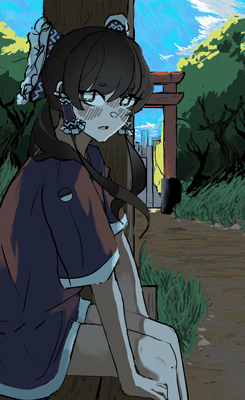

In [5]:
def rysuj_kwadrat_max(obraz, m, n, k):
    obraz1 = obraz.copy()
    pix1 = obraz1.load()
    d = k // 2
    temp = [0, 0, 0]
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            pixel = pix1[x, y]
            temp = [max(p, t) for p, t in zip(pixel, temp)]
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            pix1[x, y] = (temp[0], temp[1], temp[2])
    return obraz1

im2 = rysuj_kwadrat_max(im, 10, 15, 9)
im2 = rysuj_kwadrat_max(im2, 70, 15, 11)
im2 = rysuj_kwadrat_max(im2, 15, 70, 13)
im2

### Zad 1.2

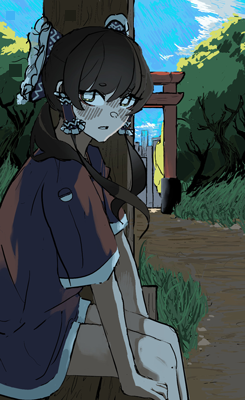

In [8]:
def rysuj_kwadrat_min(obraz, m, n, k):
    obraz1 = obraz.copy()
    pix1 = obraz1.load()
    d = k // 2
    temp = [255, 255, 255]
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            pixel = pix1[x, y]
            temp = [min(p, t) for p, t in zip(pixel, temp)]
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            pix1[x, y] = (temp[0], temp[1], temp[2])
    return obraz1

im3 = rysuj_kwadrat_min(im, 10, 15, 9)
im3 = rysuj_kwadrat_min(im3, 70, 15, 11)
im3 = rysuj_kwadrat_min(im3, 15, 70, 13)
im3

### Zad 2

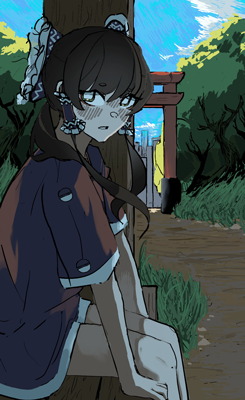

In [6]:
def zakres(w, h):
    return [(i, j) for i in range(w) for j in range(h)]


def wycinek_kolo(obraz, m_s, n_s, r, m_cel=None, n_cel=None):
    kolo = Image.new('RGB', (r * 2, r * 2), (0, 0, 0))
    obraz1 = obraz.copy()
    w, h = obraz1.size
    for i, j in zakres(r * 2, r * 2):
        oryg_i, oryg_j = m_s - r + i, n_s - r + j

        if 0 <= oryg_i < w and 0 <= oryg_j < h:
            if (i - r) ** 2 + (j - r) ** 2 < r ** 2:
                kolo.putpixel((i, j), obraz1.getpixel((oryg_i, oryg_j)))
    if m_cel is None or n_cel is None:  # zwróć sam wycinek, jeśli nie podano koordynatów celu
        return kolo
    for i, j in zakres(r * 2, r * 2):
        cel_i, cel_j = m_cel - r + i, n_cel - r + j

        if 0 <= cel_i < w and 0 <= cel_j < h:
            if (i - r) ** 2 + (j - r) ** 2 < r ** 2:
                obraz1.putpixel((cel_i, cel_j), kolo.getpixel((i, j)))
    return obraz1

im4 = wycinek_kolo(im, 65, 195, 8, 83, 266)
im4

### Zad 2.1

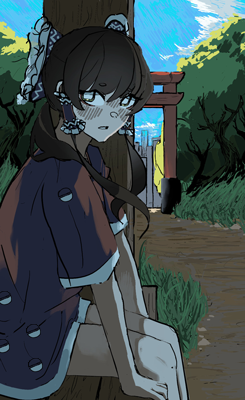

In [7]:
im5 = wycinek_kolo(im, 65, 195, 8, 2, 346)
im5 = wycinek_kolo(im5, 65, 195, 8, 4, 298)
im5 = wycinek_kolo(im5, 65, 195, 8, 33, 331)
im5 = wycinek_kolo(im5, 65, 195, 8, 35, 365)
im5

### Zad 3
Po podmianie funkcji *odbij_w_pionie* na drugą tylko lewa połowa obrazu zostaje poprawnie odbita, a prawa połowa nie zostaje prawidłowo odbita.

Dzieje się tak, gdyż druga funkcja odbija tylko na kopii zdjęcia (bez użycia oryginału) i podczas odwracania pixele z lewej strony są zastępowane przez prawe (tracone są pixele lewe).

Dlatego do odbić wymagane jest odczytywanie pixeli z niemodyfikowanego przez iterację oryginału.
